# Exploring Gibbon

In [2]:
! pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 45.8 MB/s eta 0:00:0000:0100:01


In [2]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print('PATH:', os.environ.get('PATH'))

PYTHONPATH: None
PATH: /Users/chloethurmgreene/miniconda3/bin:/Users/chloethurmgreene/miniconda3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin


In [1]:
# imports
import os
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import pandas as pd

In [ ]:
## Pre-process text for analysis using SpaCy

Before doing NLP work, most texts will need to be preprocessed in different ways. You may need to **tokenize** the text, remove stopwords, or **lemmatize** the text. What you do in pre-processing depends entirely on what your project is. 

In [3]:
nlp = spacy.load("en_core_web_sm", disable = ['ner', 'parser'])
nlp.max_length = 3045039

### Open a file 

In [ ]:
# open a file


In [ ]:
# create a spaCy doc


In [ ]:
# preview spaCy doc


### List comprehension

In [ ]:
# regular for loop to create a list


In [ ]:
# list comprehension to create a list


### Pre-process Gibbon

For our immediate purposes we want to convert the raw text of Gibbon (which is in the form of `strings`) to a list of **lemmas**.

In [4]:
def get_noun_and_verb_lemmas(text):
    """Return a list of noun and verb lemmas from a string"""
    doc = nlp(text)
    tokens = [token for token in doc]
    noun_and_verb_tokens = [token for token in tokens if token.pos_ == 'NOUN' or token.pos_ == 'VERB']
    noun_and_verb_lemmas = [noun_and_verb_token.lemma_ for noun_and_verb_token in noun_and_verb_tokens]
    return noun_and_verb_lemmas

In [ ]:
# Due to memory issues with spaCy it was necessary for me to find the longest file so that I could adjust some of SpaCy's
# default settings.
# You do not neet to run this code.
text_path = "../text/gibbon_decline_and_fall/" # path to unzipped gibbon_decline_and_fall directory
longest = 0
for file_name in os.listdir(text_path):
    with open(text_path + file_name, encoding='utf-8', mode='r') as f:
        raw_text = f.read()
    text_len = len(raw_text)
    if text_len > longest:
        longest = text_len
print(longest)

In [5]:
# Takes about 3 mintues
text_path = "../text/gibbon_decline_and_fall/"  # path to unzipped gibbon_decline_and_fall directory
gibbon_lemmas = {}
for file_name in os.listdir(text_path):
    chapter_name = file_name[23:29]
    with open(text_path + file_name, encoding='utf-8', mode = 'r') as f:
        raw_text = f.read()
    lemmas = get_noun_and_verb_lemmas(raw_text)
    gibbon_lemmas[chapter_name] = lemmas
        

In [6]:
# Attempt 2: This block of code is an alternative way to handle the memory limitations for spaCy.
# You do not need to run this code.
text_path = "../text/gibbon_decline_and_fall/"
gibbon_lemmas = {}
for file_name in os.listdir(text_path):
    chapter_name = file_name[23:29]
    with open(text_path + file_name, encoding='utf-8', mode = 'r') as f:
        raw_text = f.read()
    if len(raw_text) < 1000000:  # SpaCy will throw a memory error if a text is more than 1,000,000 characters
        lemmas = get_noun_and_verb_lemmas(raw_text)
        gibbon_lemmas[chapter_name] = lemmas
    else:
        print(f"Long chapter: {chapter_name}")
        lemmas = []
        text_lines = raw_text.split('\n')
        for text_line in text_lines:
            line_lemmas = get_noun_and_verb_lemmas(text_line)
            for line_lemma in line_lemmas:
                lemmas.append(line_lemma)
        gibbon_lemmas[chapter_name] = lemmas

KeyboardInterrupt: 

In [ ]:
# Sanity check


In [ ]:
# this code will save the data as a json file
file_name = 'gibbon_lemmas.json'
with open(file_name, encoding='utf-8', mode='w') as f:
    json.dump(gibbon_lemmas, f)

## Find the most important words by chapter in Gibbon
For this part we are going to use a library called [scikit-learn](https://scikit-learn.org/stable/). This library is primarily for machine learning, but many of its features are useful for DH work.
Advanced Reading: https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275

In [7]:
# The tool I will use here requires a string as input rather than a list, so I convert my docs from lists to strings
gibbon_chap_strings = []
gibbon_chap_names = []
for key, value in gibbon_lemmas.items():
    gibbon_chap_names.append(key)  
    chap_string = ' '.join(value)
    gibbon_chap_strings.append(chap_string)

In [8]:
# transform corpus into a matrix of word counts
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, 
                             use_idf= True, norm=None)
transformed_chaps = vectorizer.fit_transform(gibbon_chap_strings)
transformed_chaps_as_array = transformed_chaps.toarray()

In [9]:
gibbon_key_vocab_by_chap = {}
for chap, chap_name in zip(transformed_chaps_as_array, gibbon_chap_names):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names_out(), chap))
    sorted_tf_idf_tuples = sorted(tf_idf_tuples, key= lambda x: x[1], reverse=True)
    k = chap_name
    v = sorted_tf_idf_tuples[:10]  # only getting the top ten
    gibbon_key_vocab_by_chap[k] = v

In [10]:
for k, v in gibbon_key_vocab_by_chap.items():
    result = k + ' => ' + v[0][0] + ', ' + v[1][0] + ', ' + v[2][0] + ', ' + v[3][0] + ', ' + v[4][0]
    print(result)

chap63 => adhere, cloister, foe, accelerate, actor
chap62 => union, sense, company, constable, maintenance
chap60 => pilgrim, crusader, mark, marshal, aspect


In [12]:
# explore vocabulary
gibbon_key_vocab_by_chap['chap63']  # <-- you can investigate other chapters

[('adhere', 5.079441541679836),
 ('cloister', 5.079441541679836),
 ('foe', 5.079441541679836),
 ('accelerate', 3.386294361119891),
 ('actor', 3.386294361119891),
 ('aim', 3.386294361119891),
 ('amnesty', 3.386294361119891),
 ('ardour', 3.386294361119891),
 ('confinement', 3.386294361119891),
 ('debility', 3.386294361119891)]

## Conditional frequency distribution in Gibbon

### Natural Language Toolkit
The **Natural Language Toolkit** (NLTK) is a library used for natural language processing (NLP). If you want to learn more, I highly recommend working through the [NLTK Book](https://www.nltk.org/book/). This resource is a great introduction to NLP specifically and Python more generally.

A **conditional frequency distribution** (cfd) is a collection of word counts for a given condition, i.e. category. Here the category is separate chapters in Gibbon. We can chart what used are used most frequently by chapter. This will tell us something about the nature of each chapter.

In [13]:
import nltk
import matplotlib.pyplot as plt

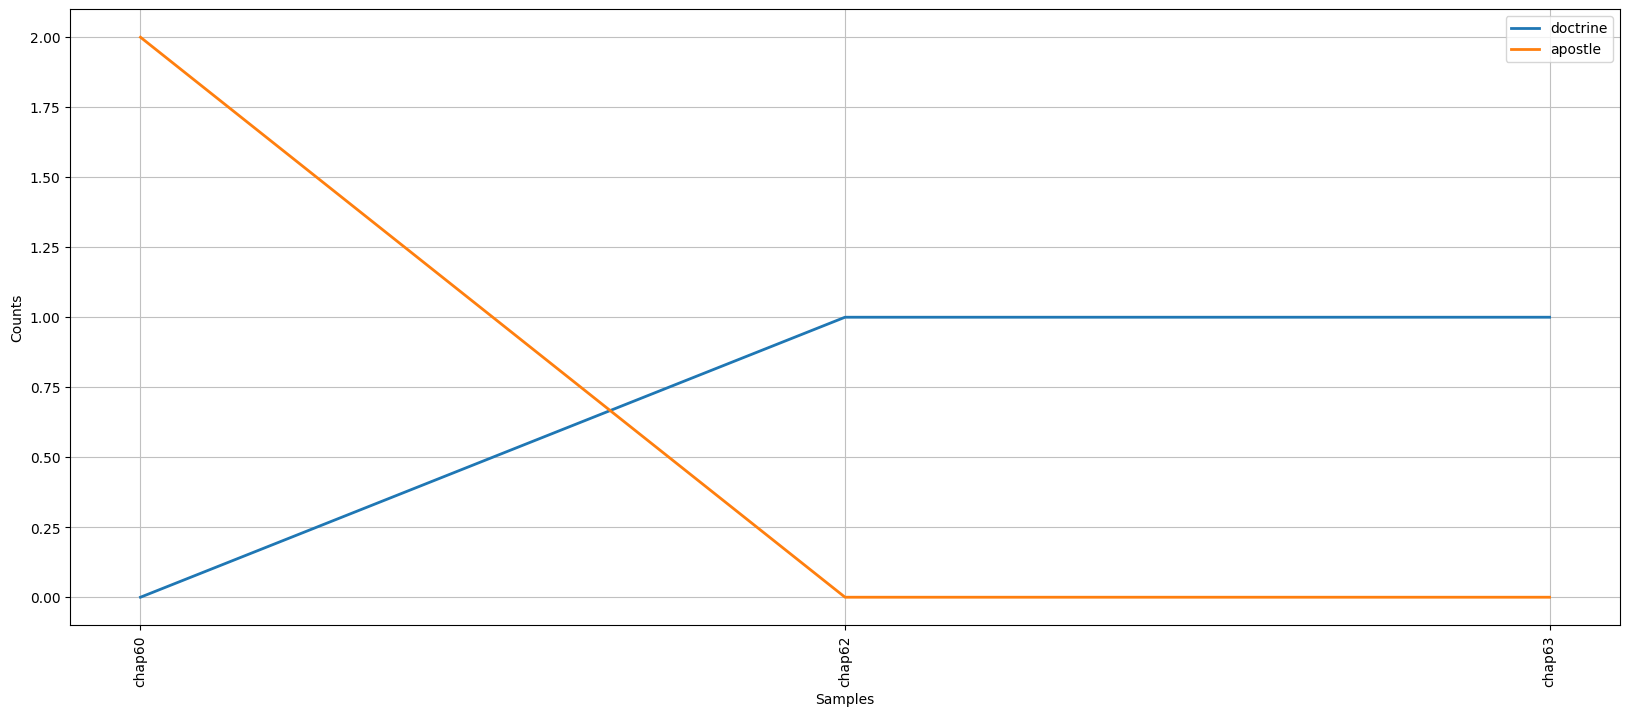

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
# conditional frequency distribution
cfd = nltk.ConditionalFreqDist(
    (target, chap_name)
    for chap_name in gibbon_lemmas.keys()
    for lemma in gibbon_lemmas[chap_name]
    for target in ['doctrine', 'apostle', 'presbyter', 'daemon', 'immortality']  # <-- instert token(s) to explore (lowercase)
    if lemma.lower().startswith(target)
)
# display plot
plt.figure(figsize=(20, 8))  # this expands the plot to make it more readable
cfd.plot()

### Activity
Based on the key vocabulary by chapter above, explore the use of different terms in the conditional frequency distribution. 
* What questions about the text does this raise for you?
* What hypotheses about the text can you form?